# qnlp-tutorial

### 1. Drawing cooking recipes

In [1]:
from discopy import Ob, Ty

egg, white, yolk = Ty('egg'), Ty('white'), Ty('yolk')

assert egg.objects == [Ob('egg')]
assert white @ yolk == Ty(Ob('white'), Ob('yolk'))

assert egg @ Ty() == egg == Ty() @ egg
assert egg @ (white @ yolk) == (egg @ white) @ yolk

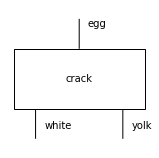

In [9]:
from discopy import Box

crack = Box('crack', dom=egg, cod=white @ yolk)

crack.draw(figsize=(2, 2))

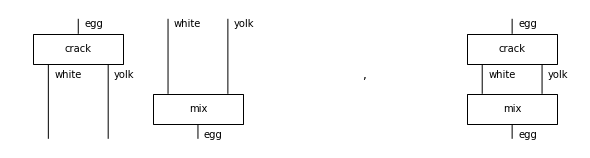

In [8]:
from discopy import drawing

mix = Box('mix', white @ yolk, egg)

crack_tensor_mix = crack @ mix
crack_then_mix = crack >> mix

drawing.equation(crack_tensor_mix, crack_then_mix, space=2, symbol=', ', figsize=(8, 2))

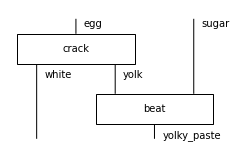

In [4]:
from discopy import Id

assert crack >> Id(white @ yolk) == crack == Id(egg) >> crack
assert crack @ Id(Ty()) == crack == Id(Ty()) @ crack

sugar, yolky_paste = Ty('sugar'), Ty('yolky_paste')
beat = Box('beat', yolk @ sugar, yolky_paste)

crack_then_beat = crack @ Id(sugar) >> Id(white) @ beat

crack_then_beat.draw(figsize=(3, 2))

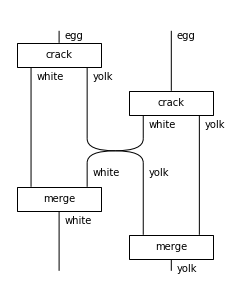

In [5]:
from discopy import Swap

merge = lambda x: Box('merge', x @ x, x)

crack_two_eggs = crack @ crack\
    >> Id(white) @ Swap(yolk, white) @ Id(yolk)\
    >> merge(white) @ merge(yolk)

crack_two_eggs.draw(figsize=(3, 4))

In [6]:
from discopy import Diagram

def pretty(diagram):
    return "Diagram(\n"\
    + "    dom={},\n".format(repr(diagram.dom))\
    + "    cod={},\n".format(repr(diagram.cod))\
    + "    boxes=[{}],\n".format(',\n           '.join(map(repr, diagram.boxes)))\
    + "    offsets={})".format(diagram.offsets)

assertion = "assert crack_two_eggs == {}".format(pretty(crack_two_eggs))

exec(assertion)
print(assertion)

assert crack_two_eggs == Diagram(
    dom=Ty('egg', 'egg'),
    cod=Ty('white', 'yolk'),
    boxes=[Box('crack', Ty('egg'), Ty('white', 'yolk')),
           Box('crack', Ty('egg'), Ty('white', 'yolk')),
           Swap(Ty('yolk'), Ty('white')),
           Box('merge', Ty('white', 'white'), Ty('white')),
           Box('merge', Ty('yolk', 'yolk'), Ty('yolk'))],
    offsets=[0, 2, 1, 0, 1])


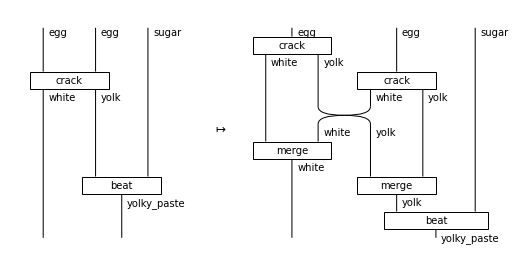

In [7]:
from discopy import Functor

crack2 = Box("crack", egg @ egg, white @ yolk)

open_crack2 = Functor(
    ob=lambda x: x,
    ar={crack2: crack_two_eggs, beat: beat})

crack2_then_beat = crack2 @ Id(sugar) >> Id(white) @ beat

drawing.equation(
    crack2_then_beat,
    open_crack2(crack2_then_beat),
    symbol='$\\mapsto$', figsize=(7, 3.5))

### 2. Tensors as boxes

In [8]:

from discopy import Dim, Tensor

matrix = Tensor(Dim(2), Dim(2), [0, 1, 1, 0])

matrix.array

array([[0, 1],
       [1, 0]])

In [9]:
assert matrix >> Tensor.id(Dim(2)) == matrix == Tensor.id(Dim(2)) >> matrix

vector = Tensor(Dim(1), Dim(2), [0, 1])
vector.array

array([0, 1])

In [10]:
vector >> matrix

Tensor(dom=Dim(1), cod=Dim(2), array=[1, 0])

In [11]:
assert Tensor.id(Dim(1)) @ matrix == matrix == matrix @ Tensor.id(Dim(1))

Tensor.id(Dim(1))

Tensor(dom=Dim(1), cod=Dim(1), array=[1.])

In [12]:
vector @ vector

Tensor(dom=Dim(1), cod=Dim(2, 2), array=[0, 0, 0, 1])

In [13]:
vector @ matrix

Tensor(dom=Dim(2), cod=Dim(2, 2), array=[0, 0, 0, 1, 0, 0, 1, 0])

In [14]:
matrix @ vector

Tensor(dom=Dim(2), cod=Dim(2, 2), array=[0, 0, 0, 1, 0, 1, 0, 0])

In [15]:
matrix @ matrix

Tensor(dom=Dim(2, 2), cod=Dim(2, 2), array=[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [16]:
import numpy as np

assert np.all(
    (matrix >> matrix).array == matrix.array.dot(matrix.array))
assert np.all(
    (matrix @ matrix).array == np.moveaxis(np.tensordot(
    matrix.array, matrix.array, 0), range(4), [0, 2, 1, 3]))

In [17]:
matrix = Tensor(Dim(2), Dim(2), [0, -1j, 1j, 0])

matrix

Tensor(dom=Dim(2), cod=Dim(2), array=[0.+0.j, -0.-1.j, 0.+1.j, 0.+0.j])

In [18]:
matrix[::-1]

Tensor(dom=Dim(2), cod=Dim(2), array=[0.-0.j, 0.-1.j, -0.+1.j, 0.-0.j])

In [19]:
matrix >> matrix[::-1]

Tensor(dom=Dim(2), cod=Dim(2), array=[1.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])

In [20]:
vector1 = Tensor(Dim(1), Dim(2), [-1j, 1j])

vector1[::-1]

Tensor(dom=Dim(2), cod=Dim(1), array=[-0.+1.j, 0.-1.j])

In [21]:
vector

Tensor(dom=Dim(1), cod=Dim(2), array=[0, 1])

In [22]:
vector >> vector1[::-1]

Tensor(dom=Dim(1), cod=Dim(1), array=[0.-1.j])

In [23]:
vector + vector

Tensor(dom=Dim(1), cod=Dim(2), array=[0, 2])

In [24]:
zero = Tensor.zeros(Dim(1), Dim(2))
assert vector + zero == vector == zero + vector

In [25]:
swap = Tensor.swap(Dim(2), Dim(3))

assert swap.dom == Dim(2) @ Dim(3) and swap.cod == Dim(3) @ Dim(2)
assert swap >> swap[::-1] == Tensor.id(Dim(2, 3))
assert swap[::-1] >> swap == Tensor.id(Dim(3, 2))

matrix1 = Tensor(Dim(3), Dim(3), list(range(9)))

assert vector @ matrix1 >> swap == matrix1 @ vector
assert swap >> matrix1 @ matrix >> swap[::-1] == matrix @ matrix1

In [26]:
cup, cap = Tensor.cups(Dim(2), Dim(2)), Tensor.caps(Dim(2), Dim(2))

print("cup == {}".format(cup))
print("cap == {}".format(cap))

cup == Tensor(dom=Dim(2, 2), cod=Dim(1), array=[1., 0., 0., 1.])
cap == Tensor(dom=Dim(1), cod=Dim(2, 2), array=[1., 0., 0., 1.])


In [27]:
cup.array

array([[1., 0.],
       [0., 1.]])

In [28]:
cap.array

array([[1., 0.],
       [0., 1.]])

In [29]:
_id = Tensor.id(Dim(2))

assert cap @ _id >> _id @ cup == _id == _id @ cap >> cup @ _id

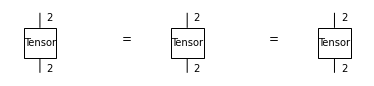

In [30]:
drawing.equation(cap @ _id >> _id @ cup, _id, _id @ cap >> cup @ _id, figsize=(5, 1))

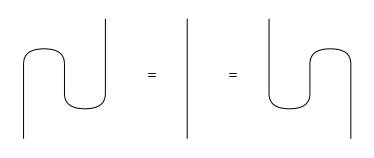

In [31]:
from discopy import Cup, Cap

left_snake = Cap(Dim(2), Dim(2)) @ Id(Dim(2)) >> Id(Dim(2)) @ Cup(Dim(2), Dim(2))
right_snake = Id(Dim(2)) @ Cap(Dim(2), Dim(2)) >> Cup(Dim(2), Dim(2)) @ Id(Dim(2))

drawing.equation(left_snake, Id(Dim(2)), right_snake, figsize=(5, 2), draw_type_labels=False)

In [32]:
from discopy import tensor

_eval = tensor.Functor(
    ob=lambda x: x,
    ar=lambda f: f)

assert _eval(left_snake) == _eval(Id(Dim(2))) == _eval(right_snake)

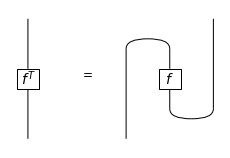

In [33]:
f = tensor.Box("$f$", Dim(2), Dim(2), [1, 2, 3, 4])
f_T = tensor.Box("$f^T$", Dim(2), Dim(2), [1, 3, 2, 4])

diagram = tensor.Diagram(
    dom=Dim(2), cod=Dim(2),
    boxes=[Cap(Dim(2), Dim(2)), f, Cup(Dim(2), Dim(2))],
    offsets=[0, 1, 1])

drawing.equation(f_T, diagram, figsize=(3, 2), fontsize=14, draw_type_labels=False)

assert not f_T == diagram
assert f_T.eval() == diagram.eval()

### 3. Drawing quantum circuits

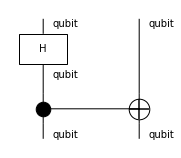

In [34]:
from discopy.quantum import qubit, H, Id, CX, QuantumGate

assert H == QuantumGate("H", 1, 1 / np.sqrt(2) * np.array([1, 1, 1, -1]), _dagger=None)

# Hadmard Gate H = 1/(2^0.5) [[1,  1]
#                             [1, -1]]
circuit = H @ Id(qubit) >> CX

circuit.draw(figsize=(2, 2), draw_type_labels=True, margins=(.1, .1))

In [35]:
assert H.eval() == H.array
assert Id(qubit).eval() == Tensor.id(Dim(2))

assert circuit.eval() == H.eval() @ Id(qubit).eval() >> CX.eval()

CX >> H @ Id(1)


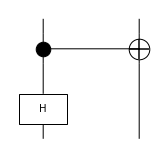

In [36]:
print(circuit[::-1])
circuit[::-1].draw(figsize=(2, 2), margins=(.1,.1))

In [37]:
assert (CX >> CX[::-1]).eval() == Id(qubit ** 2).eval()
assert np.all(np.isclose((H >> H[::-1]).eval(), Id(qubit).eval()))

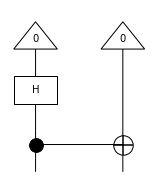

In [38]:
from discopy.quantum import Ket

(Ket(0, 0) >> circuit).draw(figsize=(2, 2.5))

# from left (q0) to right (qn)

In [39]:
(Ket(0, 0) >> circuit).eval()

Tensor(dom=Dim(1), cod=Dim(2, 2), array=[0.70710678+0.j, 0.    +0.j, 0.    +0.j, 0.70710678+0.j])

amplitude:


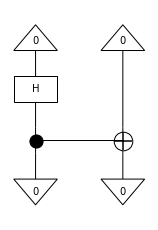

probability: 0.4999999999999999


In [40]:
from discopy.quantum import Bra

experiment = Ket(0, 0) >> circuit >> Bra(0, 0)

print("amplitude:")
experiment.draw(figsize=(2, 3))
amplitude = experiment.eval().array[0]

probability = abs(amplitude) ** 2
print("probability: {}".format(probability))

In [41]:
from discopy.quantum import Measure, Discard

print(Discard().eval())
print(Measure().eval())

CQMap(dom=Q(Dim(2)), cod=CQ(), array=[1., 0., 0., 1.])
CQMap(dom=Q(Dim(2)), cod=C(Dim(2)), array=[1, 0, 0, 0, 0, 0, 0, 1])


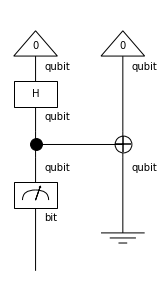

CQMap(dom=CQ(), cod=C(Dim(2)), array=[0.5+0.j, 0. +0.j])

In [42]:
(Ket(0, 0) >> circuit >> Measure() @ Discard()).draw(figsize=(2, 4))
(Ket(0, 0) >> circuit >> Measure() @ Discard()).eval()

In [43]:
from discopy.quantum import SWAP

circuit.to_tk()

tk.Circuit(2).H(0).CX(0, 1)

In [44]:
(SWAP >> circuit >> SWAP).to_tk()

tk.Circuit(2).H(1).CX(1, 0)

In [45]:
from pytket.extensions.qiskit import AerBackend

aer = AerBackend()

(circuit >> Measure() @ Discard()).eval(backend=aer)

Tensor(dom=Dim(1), cod=Dim(2), array=[0.51464844, 0.48535156])

### 4. Drawing grammatical structure

#### The basic ingredients are grammatical types: n for noun, s for sentence, etc. 
#### Each ingredient has left and right adjoints n.l and n.r which represent a missing noun on the right and left respectively. 
#### For example, the type for intransitive verbs n.r @ s reads “take a noun on your left and give a sentence”.

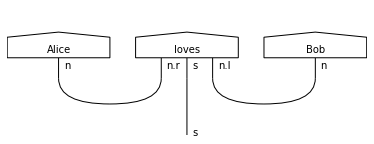

In [46]:
from discopy import Ty, Id, Word, Cup, pregroup,tensor

n, s = Ty('n'), Ty('s')

Alice = Word("Alice", n)
loves = Word("loves", n.r @ s @ n.l)
Bob = Word("Bob", n)

grammar = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)

sentence = Alice @ loves @ Bob >> grammar
pregroup.draw(sentence, figsize=(5, 5))

In [47]:
F = tensor.Functor(
    ob={n: 2, s: 1},
    ar={Alice: [0, 1], loves: [0, 1, 1, 0], Bob: [1, 0]})

print(F(Alice @ loves @ Bob))
print(F(grammar))

assert F(Alice @ loves @ Bob >> grammar) == 1

Tensor(dom=Dim(1), cod=Dim(2, 2, 2, 2), array=[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.])
Tensor(dom=Dim(2, 2, 2, 2), cod=Dim(1), array=[1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])


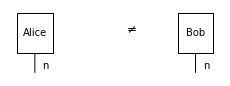

In [48]:
assert not F(Alice) >> F(Bob)[::-1]

drawing.equation(Alice, Bob, symbol="$\\neq$", figsize=(3, 1))

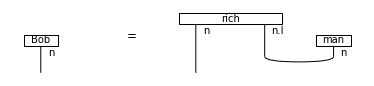

In [49]:
rich, man = Word("rich", n @ n.l), Word("man", n)

F.ar[rich], F.ar[man] = [1, 0, 0, 0], [1, 0]

rich_man = rich @ man >> Id(n) @ Cup(n.l, n)

assert F(Bob) >> F(rich_man)[::-1]  # i.e. Bob is a rich man.

drawing.equation(Bob, rich_man, figsize=(5, 1))

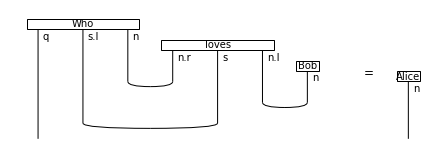

In [50]:
q = Ty('q')

Who = Word("Who", q @ s.l @ n)

F.ob[q], F.ar[Who] = 2, [1, 0, 0, 1]

question = Who @ loves @ Bob\
    >> Id(q @ s.l) @ Cup(n, n.r) @ Id(s) @ Cup(n.l, n)\
    >> Id(q) @ Cup(s.l, s)

answer = Alice

assert F(question) == F(answer)

drawing.equation(question, answer, figsize=(6, 2))

#### 5. Putting it all together: QNLP

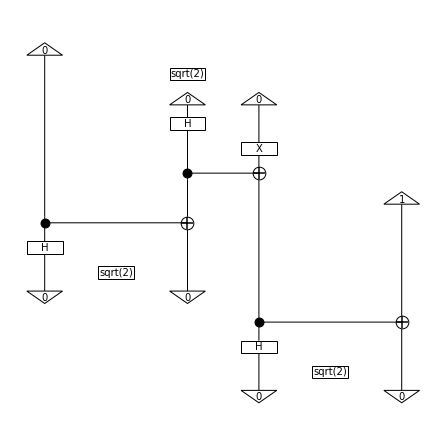

In [51]:
from discopy.quantum import circuit, qubit, sqrt, X

F_ = circuit.Functor(
    ob={s: Ty(), n: qubit},
    ar={Alice: Ket(0),
        loves: sqrt(2) @ Ket(0, 0) >> H @ X >> CX,
        Bob: Ket(1)})

F_(sentence).draw(figsize=(6, 6))

assert F_(sentence).eval() == F(sentence)

In [53]:
from pytket.extensions.qiskit import tk_to_qiskit

tk_circ = F_(sentence).to_tk()
print("{}:\n{}\n".format(tk_circ, '\n'.join(map(str, tk_circ))))
print("post selection:\n{}\n".format(tk_circ.post_selection))
print("scalar:\n{}\n".format(tk_circ.scalar))
print("qiskit circuit:")
tk_to_qiskit(tk_circ).draw()

<tket::Circuit, qubits=4, gates=12>:
H q[1];
X q[2];
X q[3];
CX q[1], q[2];
CX q[0], q[1];
CX q[2], q[3];
Measure q[1] --> c[1];
Measure q[3] --> c[3];
H q[0];
H q[2];
Measure q[0] --> c[0];
Measure q[2] --> c[2];

post selection:
{0: 0, 1: 0, 2: 0, 3: 0}

scalar:
8.000000000000005

qiskit circuit:


┌───┐     ┌─┐   
q_0: ────────────■──┤ H ├─────┤M├───
     ┌───┐     ┌─┴─┐└┬─┬┘     └╥┘   
q_1: ┤ H ├──■──┤ X ├─┤M├───────╫────
     ├───┤┌─┴─┐└───┘ └╥┘ ┌───┐ ║ ┌─┐
q_2: ┤ X ├┤ X ├──■────╫──┤ H ├─╫─┤M├
     ├───┤└───┘┌─┴─┐  ║  └┬─┬┘ ║ └╥┘
q_3: ┤ X ├─────┤ X ├──╫───┤M├──╫──╫─
     └───┘     └───┘  ║   └╥┘  ║  ║ 
c: 4/═════════════════╩════╩═══╩══╩═
                      1    3   0  2